In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

import numpy as np
import scipy.fft
import glob

import scipy.signal

from utils import style
style.make_style()

Noise data from 4 timeseries

In [2]:
data_noise = glob.glob('../data/noise/**')


d = np.array([np.loadtxt(data, skiprows=24) for data in data_noise])
d_avg = d.mean(0)

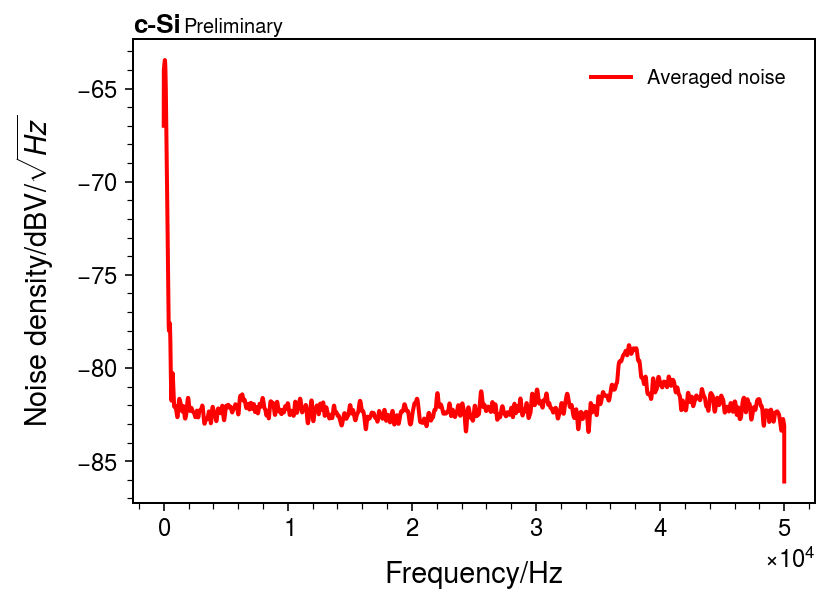

In [10]:
f, nsd = scipy.signal.welch(d_avg, 1e5, nfft=1e5, nperseg=1e3)
nsd = 10 * np.log10(nsd)
plt.plot(f,nsd, 'r', label='Averaged noise')
plt.xlabel('Frequency/Hz')
plt.ylabel('Noise density/$\mathrm{dBV}/\sqrt{Hz}$')
hep.label.exp_text('c-Si', 'Preliminary')
plt.legend()
# plt.xlim(0,5_000)
plt.savefig('noise_nds.pdf', bbox_inches='tight')